In [264]:
import pandas as pd
import os
import glob
import numpy as np

In [265]:
def process_excel(file_path):
    # Read the Excel file
    data = pd.read_excel(file_path, header=None)
    df = pd.read_excel(file_path, header=None)
    # Define new header from row 11
    idx = df[df[1] == 'Jan'].index[0]
    # Use this row to set the new headers
    df.columns = df.iloc[idx]

    # Drop all rows up to and including the row at idx
    df = df.loc[idx+1:]

    # Reset index if necessary
    df.reset_index(drop=True, inplace=True)


    # Convert to long format
    long_df = pd.melt(df, id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                      var_name='Month', value_name='Car CPI')

    # Map month abbreviations to numbers
    month_map = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
    long_df['Month'] = long_df['Month'].map(month_map)

    # Create year_month column
    long_df['year_month'] = pd.to_datetime(long_df['Year'].astype(str) + '-' + long_df['Month'].astype(str)).dt.strftime('%Y-%m')

    # Assign Region value from a specific cell
    mask = data[0].astype(str).str.contains('Area', na=False)
    values_from_column1 = data.loc[mask, 1]
    # Use the mask to select values from column 1
    long_df["Region"] = values_from_column1.values[0]

    # Sort and handle missing values
    long_df = long_df.sort_values(by=["year_month"])
    #long_df['Car CPI'] = long_df['Car CPI'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
    
    return long_df[["Region", "year_month", "Car CPI"]]


In [266]:
def process_all_files(directory):
    # Get all .xlsx files in the directory
    files = glob.glob(os.path.join(directory, '*.xlsx'))
    df_list = []

    # Process each file
    for file in files:
        df = process_excel(file)
        df_list.append(df)
    # Concatenate all dataframes
    final_df = pd.concat(df_list, ignore_index=True)
    return final_df


In [267]:
directory = r'C:\Users\tosea\Liu_Dissertation_GT_Code\cpi_new_and_used_cars'
final_dataframe = process_all_files(directory)


C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Pytho

C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\tosea\AppData\Roaming\Pytho

In [268]:
#read semiconductor data
semi = pd.read_csv(r'C:\Users\tosea\Liu_Dissertation_GT_Code\cpi_new_and_used_cars\semi_conductor_ppi.csv')

# Convert 'DATE' column to datetime and format
semi['DATE'] = pd.to_datetime(semi['DATE']).dt.strftime('%Y-%m')
# Rename column
semi.rename(columns={'PCU33443344': 'Semiconductor PPI', 'DATE':'year_month'}, inplace=True)


In [269]:
date_array = np.array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
                       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
                       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
                       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
                       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
                       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
                       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
                       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
                       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
                       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
                      dtype=object)

In [270]:
#interpolate semi

semi['year_month'] = pd.to_datetime(semi['year_month'])

# Create DataFrame from date array
date_df = pd.DataFrame(date_array, columns=['year_month'])
date_df['year_month'] = pd.to_datetime(date_df['year_month'])

# Merge and interpolate
merged_df = date_df.merge(semi, on='year_month', how='left')
merged_df.set_index('year_month', inplace=True)
merged_df['Semiconductor PPI'] = merged_df['Semiconductor PPI'].interpolate().bfill().ffill()
merged_df.reset_index(inplace = True)

In [271]:
final_dataframe = final_dataframe[final_dataframe['year_month'] < "2023-01"]

In [272]:
def process_region(group):
    # Create DataFrame from date array
    date_array = np.array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
                       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
                       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
                       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
                       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
                       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
                       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
                       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
                       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
                       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
                      dtype=object)
    date_df = pd.DataFrame(date_array, columns=['year_month'])
    date_df['year_month'] = pd.to_datetime(date_df['year_month'])
    group['year_month'] = pd.to_datetime(group['year_month'])

    merged_df = date_df.merge(group, on = "year_month", how = 'outer')
    merged_df.set_index('year_month', inplace=True)

    return merged_df

# Apply the function to each group
complete_df = final_dataframe.groupby('Region').apply(process_region)

complete_df = complete_df.drop("Region", axis = 1).reset_index()

In [273]:

# Merge the dataframes on 'year_month'
result_df = pd.merge(complete_df, merged_df, on='year_month', how='outer')

result_df['year_month'] = pd.to_datetime(result_df['year_month'])

result_df = result_df[(result_df['year_month'] >= pd.to_datetime('2017-01')) & (result_df['year_month'] <= pd.to_datetime('2022-12'))]

In [275]:
result_df = result_df[~result_df['Region'].isna()]

In [276]:
[result_df.isna().any()]

[Region               False
 year_month           False
 Car CPI               True
 Semiconductor PPI    False
 dtype: bool]

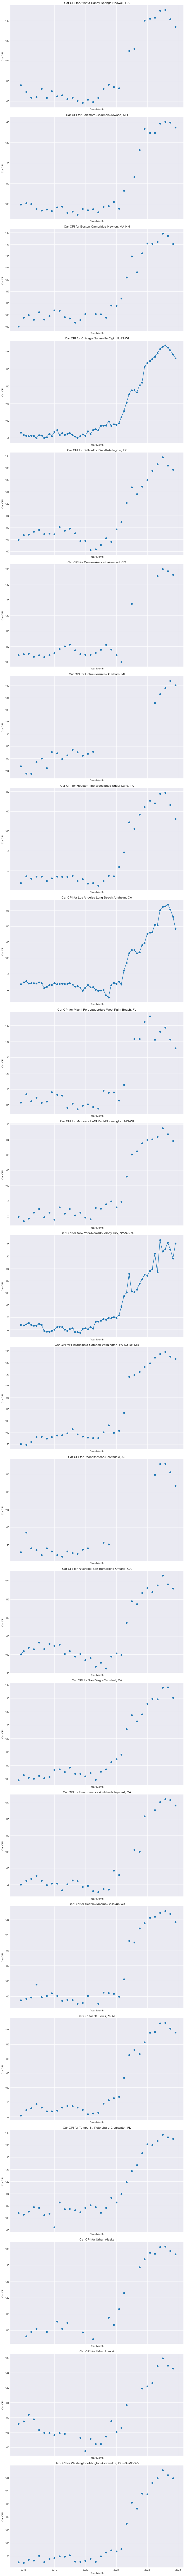

In [277]:
# Get unique regions for title management
regions = result_df['Region'].unique()

# Determine the number of unique regions to decide the number of subplots
num_regions = len(regions)
fig, axes = plt.subplots(num_regions, 1, figsize=(10, 6 * num_regions), sharex=True)

# Check if there's only one region to avoid indexing error
if num_regions == 1:
    axes = [axes]  # Make it iterable

# Loop through each region and create a plot
for ax, region in zip(axes, regions):
    region_data = result_df[result_df['Region'] == region]
    ax.plot(region_data['year_month'], region_data['Car CPI'], marker='o', linestyle='-')
    ax.set_title(f'Car CPI for {region}')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Car CPI')
    ax.grid(True)  # Optional: adds a grid for easier reading

# Ensure layout does not overlap and plots are readable
plt.tight_layout()
plt.show()


In [278]:
region_dma_walk = pd.read_csv(r"DMA_region_walk.csv")

merged_df = pd.merge(result_df, region_dma_walk, on='Region', how='left')

merged_df.to_csv("new_and_used_car_cpi_semiconductor_ppi.csv")